In [9]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::opt_einsum==3.3.0=pyhd8ed1ab_1
  - conda-forge/linux-64::h5py==3.8.0=nompi_py310ha66b2ad_101
  - conda-forge/linux-64::scipy==1.10.1=py310h8deb116_2
  - conda-forge/noarch::keras-preprocessing==1.1.2=pyhd8ed1ab_0
  - conda-forge/noarch::tensorboard==2.11.2=pyhd8ed1ab_0
  - conda-forge/linux-64::tensorflow-base==2.11.1=cpu_py310h335d60c_0
  - conda-forge/linux-64::tensorflow-estimator==2.11.1=cpu_py310hfed9998_0
  - conda-forge/linux-64::tensorflow==2.11.1=cpu_py310hd1aba9c_0
  - conda-forge/linux-64::contourpy==1.0.7=py310hdf3cbec_0
  - conda-forge/linux-64::matplotlib-base==3.7.1=py310he60537e_0
  - conda-forge/linux-64::matplotlib==3.7.1=py310hff52083_0
  - conda-forge/linux-64::daal4py==2023.1.1=py310hd3e5ea5_0
  - conda-forge/linux-64::scikit-learn-intelex==2023.1.1=py31

In [1]:
from imblearn.over_sampling import SMOTE

In [45]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
#import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("/home/carmen/Escritorio/TFM/ml_anonymization/datasets/bank_dataset/csv/bank-additional-full_raw.csv", sep=";")

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df = df.drop(["duration", "campaign", "pdays", "previous", "poutcome"], axis=1)

In [49]:
df["job"] = df["job"].astype("category").cat.codes
df["marital"] = df["marital"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes
df["loan"] = df["loan"].astype("category").cat.codes
df["contact"] = df["contact"].astype("category").cat.codes
df["month"] = df["month"].astype("category").cat.codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
df["y"] = df["y"].astype("category").cat.codes

In [64]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [104]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30882, 15)
X_test shape: (10294, 15)
y_train: (30882,)
y_test shape: (10294,)


In [53]:
smote = SMOTE(k_neighbors = 5, random_state=0)
X_train_so, y_train_so = smote.fit_resample(X_train, y_train)

### VIOLINPLOTS

In [94]:
df = pd.read_csv("/home/carmen/Escritorio/TFM/ml_anonymization/datasets/bank_dataset/csv/bank-additional-full_raw.csv", sep=";")

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df = df.drop(["duration", "campaign", "pdays", "previous", "poutcome"], axis=1)

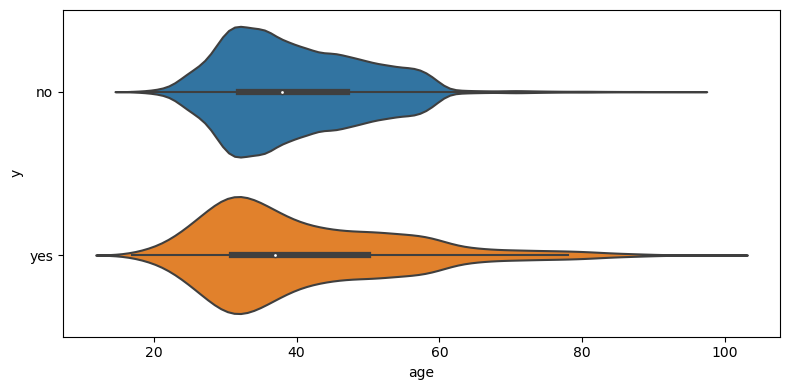

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting all columns except the target ('y')
features_to_plot = ['age']

# Calculate the appropriate figure size based on the number of features
fig_height = len(features_to_plot) * 4
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(8, fig_height))

# Iterate over each feature and generate the violinplot
for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.violinplot(data=df, x=feature, y='y', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('y')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()


In [101]:
df["job"] = df["job"].astype("category").cat.codes
df["marital"] = df["marital"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes
df["loan"] = df["loan"].astype("category").cat.codes
df["contact"] = df["contact"].astype("category").cat.codes
df["month"] = df["month"].astype("category").cat.codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
df["y"] = df["y"].astype("category").cat.codes

In [91]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1


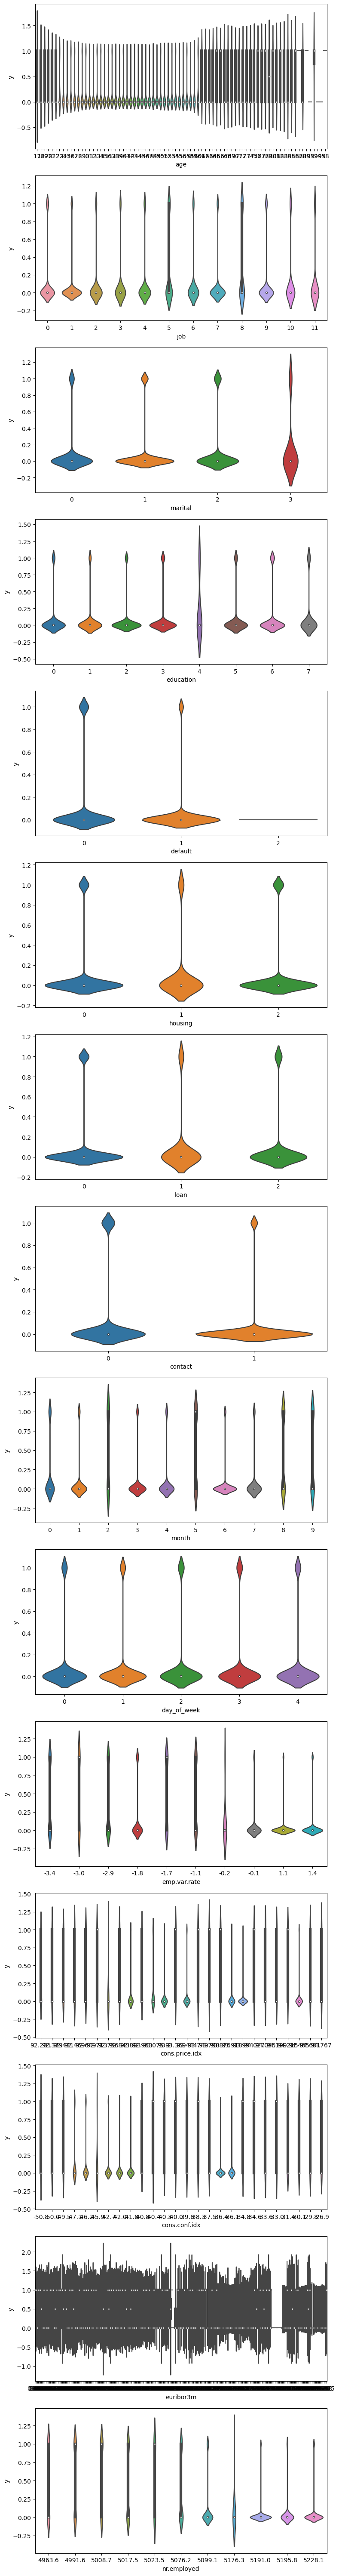

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting all columns except the target ('y')
features_to_plot = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate the appropriate figure size based on the number of features
fig_height = len(features_to_plot) * 4
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(8, fig_height))
# Iterate over each feature and generate the violinplot
for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.violinplot(data=df, x=feature, y='y', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('y')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()


Violinplots are useful for visualizing the distribution of data in different categories of a variable. Each violin plot shows the estimated probability density of the data in each category, as well as providing information on the median, quartiles and width of the distribution.

The x-axis of each violin chart shows the variable or characteristic you are analyzing, such as 'age', 'job', 'marital', etc. The y-axis shows the range of values of the target variable ('y' in this case).


The body of the violin plot shows the shape of the data distribution. It is wider in areas where there is a higher concentration of data and narrower in areas where there is less data. In addition, inside each violin plot, there is a white marker representing the median of the data.

Violin plots can help you make various interpretations:

Comparison of distributions: You can visually compare the distributions of different categories of a variable to identify differences or similarities. For example, you can compare the distribution of age for different job categories.

Central tendencies: You can look at the median in each violin plot to get an idea of the central tendency of the data in each category. If there are significant differences in the medians between categories, this may indicate a relationship between the analyzed characteristic and the target variable.

Data dispersion: The width of the violin plot provides information about the dispersion of the data in each category. If the violin plot is wider, it indicates that the data are more dispersed, while if it is narrower, it indicates less dispersion.

Outliers: You can identify outliers or extreme values in violin plots. These values are represented as points outside the main body of the violin plot.

In summary, violin plots allow you to explore the distribution of data in different categories of a variable and detect patterns, trends and outliers. This can help you gain a visual understanding of how the characteristics of the data set relate to the target variable and perform comparative analysis across categories.

In [12]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (54806, 15)
X_test shape: (10294, 15)
y_train: (54806,)
y_test shape: (10294,)


### LOGISTIC REGRESSION (WITH SMOTE):  
#### Linear regression method for binary classification problems

In [19]:
model = LogisticRegression(class_weight='balanced')
model.fit( X_train, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
y_pred_logistic = model.predict(X_test)

In [21]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)

Accuracy: 0.7990091315329318
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      9134
           1       0.31      0.63      0.41      1160

    accuracy                           0.80     10294
   macro avg       0.63      0.72      0.65     10294
weighted avg       0.87      0.80      0.83     10294



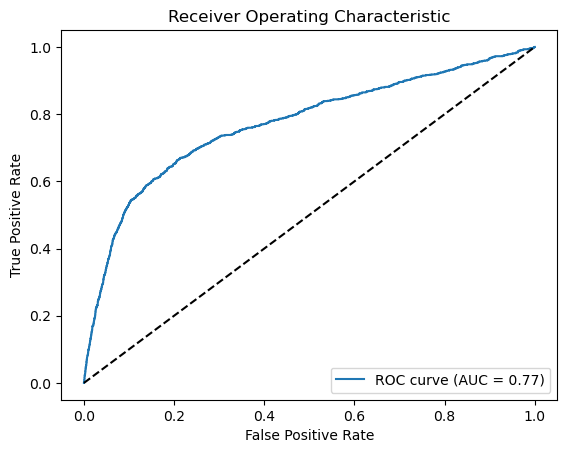

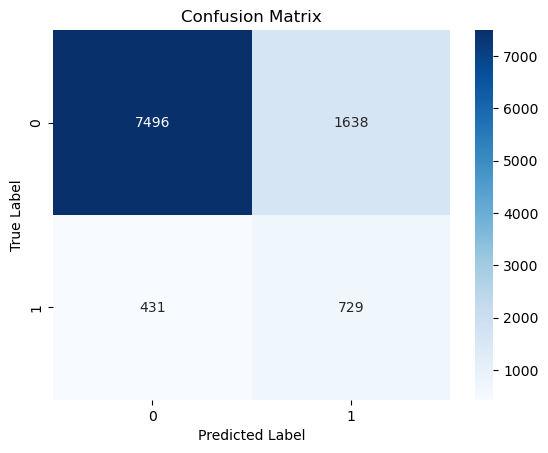

In [22]:
# Generate ROC curve and calculate AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gradient Boosting:

In [23]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 88.96%


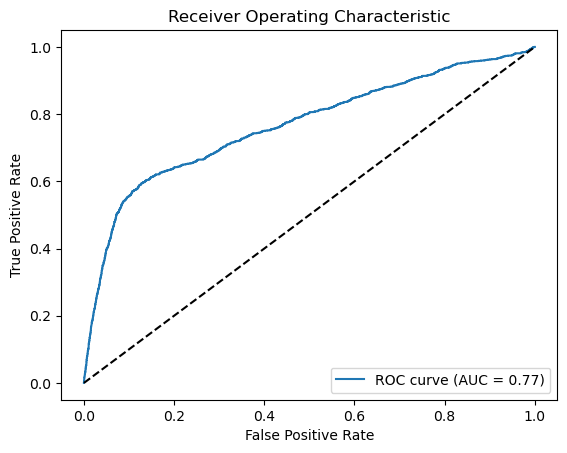

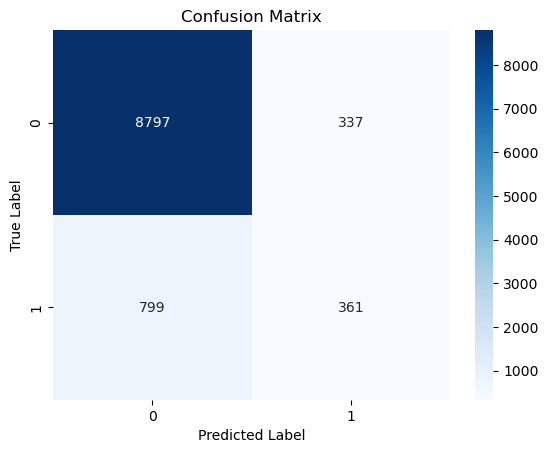

In [24]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_gradient_boosting.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### NEURAL NETWORK:

We start creating the model function

In [25]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter gridB
param_grid = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search = GridSearchCV(model_nn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search.best_params_
best_params_nn

Epoch 1/10


/tmp/ipykernel_9397/1349780580.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)
2023-06-29 12:41:00.408658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2284/2284 [==============================] - 2s 777us/step - loss: 0.5003 - accuracy: 0.7300
Epoch 2/10
2284/2284 [==============================] - 2s 739us/step - loss: 0.4914 - accuracy: 0.7411
Epoch 3/10
2284/2284 [==============================] - 2s 752us/step - loss: 0.4851 - accuracy: 0.7495
Epoch 4/10
2284/2284 [==============================] - 2s 741us/step - loss: 0.4784 - accuracy: 0.7553
Epoch 5/10
2284/2284 [==============================] - 2s 733us/step - loss: 0.4726 - accuracy: 0.7602
Epoch 6/10
2284/2284 [==============================] - 2s 755us/step - loss: 0.4651 - accuracy: 0.7668
Epoch 7/10
2284/2284 [==============================] - 2s 757us/step - loss: 0.4587 - accuracy: 0.7712
Epoch 8/10
2284/2284 [==============================] - 2s 754us/step - loss: 0.4508 - accuracy: 0.7789
Epoch 9/10
2284/2284 [==============================] - 2s 758us/step - loss: 0.4434 - accuracy: 0.7838
Epoch 10/10
1142/1142 [==============================] - 1s 530us/step - lo

Epoch 18/20
2284/2284 [==============================] - 2s 818us/step - loss: 0.3963 - accuracy: 0.8332
Epoch 19/20
2284/2284 [==============================] - 2s 896us/step - loss: 0.3929 - accuracy: 0.8342
Epoch 20/20
1142/1142 [==============================] - 1s 560us/step - loss: 0.8443 - accuracy: 0.5482
Epoch 1/20
2284/2284 [==============================] - 2s 816us/step - loss: 0.5016 - accuracy: 0.7282
Epoch 2/20
2284/2284 [==============================] - 2s 832us/step - loss: 0.4911 - accuracy: 0.7386
Epoch 3/20
2284/2284 [==============================] - 2s 836us/step - loss: 0.4818 - accuracy: 0.7513
Epoch 4/20
2284/2284 [==============================] - 2s 833us/step - loss: 0.4736 - accuracy: 0.7607
Epoch 5/20
2284/2284 [==============================] - 2s 834us/step - loss: 0.4661 - accuracy: 0.7680
Epoch 6/20
2284/2284 [==============================] - 2s 837us/step - loss: 0.4577 - accuracy: 0.7770
Epoch 7/20
2284/2284 [==============================] - 2s 84

2284/2284 [==============================] - 2s 951us/step - loss: 0.3341 - accuracy: 0.8592
Epoch 28/30
2284/2284 [==============================] - 2s 945us/step - loss: 0.3320 - accuracy: 0.8592
Epoch 29/30
2284/2284 [==============================] - 2s 951us/step - loss: 0.3282 - accuracy: 0.8614
Epoch 30/30
1142/1142 [==============================] - 1s 680us/step - loss: 0.8037 - accuracy: 0.6091
Epoch 1/30
2284/2284 [==============================] - 2s 781us/step - loss: 0.5520 - accuracy: 0.7246
Epoch 2/30
2284/2284 [==============================] - 2s 805us/step - loss: 0.5420 - accuracy: 0.7309
Epoch 3/30
2284/2284 [==============================] - 2s 816us/step - loss: 0.5365 - accuracy: 0.7327
Epoch 4/30
2284/2284 [==============================] - 2s 821us/step - loss: 0.5303 - accuracy: 0.7362
Epoch 5/30
2284/2284 [==============================] - 2s 820us/step - loss: 0.5243 - accuracy: 0.7395
Epoch 6/30
2284/2284 [==============================] - 2s 857us/step - 

2284/2284 [==============================] - 2s 805us/step - loss: 0.3583 - accuracy: 0.8473
Epoch 29/30
2284/2284 [==============================] - 2s 812us/step - loss: 0.3545 - accuracy: 0.8509
Epoch 30/30
1142/1142 [==============================] - 1s 567us/step - loss: 0.7753 - accuracy: 0.6108
Epoch 1/30
2284/2284 [==============================] - 2s 807us/step - loss: 0.5005 - accuracy: 0.7310
Epoch 2/30
2284/2284 [==============================] - 2s 810us/step - loss: 0.4919 - accuracy: 0.7364
Epoch 3/30
2284/2284 [==============================] - 2s 815us/step - loss: 0.4841 - accuracy: 0.7486
Epoch 4/30
2284/2284 [==============================] - 2s 808us/step - loss: 0.4755 - accuracy: 0.7587
Epoch 5/30
2284/2284 [==============================] - 2s 911us/step - loss: 0.4667 - accuracy: 0.7645
Epoch 6/30
2284/2284 [==============================] - 2s 871us/step - loss: 0.4588 - accuracy: 0.7726
Epoch 7/30
2284/2284 [==============================] - 2s 817us/step - l

1142/1142 [==============================] - 1s 904us/step - loss: 0.4362 - accuracy: 0.8180
Epoch 7/10
1142/1142 [==============================] - 1s 891us/step - loss: 0.4324 - accuracy: 0.8205
Epoch 8/10
1142/1142 [==============================] - 1s 896us/step - loss: 0.4296 - accuracy: 0.8206
Epoch 9/10
1142/1142 [==============================] - 1s 890us/step - loss: 0.4265 - accuracy: 0.8213
Epoch 10/10
571/571 [==============================] - 0s 606us/step - loss: 0.9553 - accuracy: 0.5429
Epoch 1/10
1142/1142 [==============================] - 2s 919us/step - loss: 0.5018 - accuracy: 0.7271
Epoch 2/10
1142/1142 [==============================] - 1s 941us/step - loss: 0.4918 - accuracy: 0.7391
Epoch 3/10
1142/1142 [==============================] - 1s 948us/step - loss: 0.4845 - accuracy: 0.7472
Epoch 4/10
1142/1142 [==============================] - 1s 952us/step - loss: 0.4779 - accuracy: 0.7548
Epoch 5/10
1142/1142 [==============================] - 1s 944us/step - loss

1142/1142 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8305
Epoch 16/20
1142/1142 [==============================] - 1s 989us/step - loss: 0.4056 - accuracy: 0.8301
Epoch 17/20
1142/1142 [==============================] - 1s 1ms/step - loss: 0.4013 - accuracy: 0.8329
Epoch 18/20
1142/1142 [==============================] - 1s 1ms/step - loss: 0.3992 - accuracy: 0.8342
Epoch 19/20
1142/1142 [==============================] - 1s 1ms/step - loss: 0.3962 - accuracy: 0.8334
Epoch 20/20
571/571 [==============================] - 0s 674us/step - loss: 1.0477 - accuracy: 0.5198
Epoch 1/20
1142/1142 [==============================] - 2s 959us/step - loss: 0.5039 - accuracy: 0.7262
Epoch 2/20
1142/1142 [==============================] - 1s 865us/step - loss: 0.4917 - accuracy: 0.7393
Epoch 3/20
1142/1142 [==============================] - 1s 821us/step - loss: 0.4857 - accuracy: 0.7458
Epoch 4/20
1142/1142 [==============================] - 1s 816us/step - loss: 0.

1142/1142 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8369
Epoch 27/30
1142/1142 [==============================] - 1s 913us/step - loss: 0.3847 - accuracy: 0.8375
Epoch 28/30
1142/1142 [==============================] - 1s 860us/step - loss: 0.3832 - accuracy: 0.8393
Epoch 29/30
1142/1142 [==============================] - 1s 873us/step - loss: 0.3800 - accuracy: 0.8400
Epoch 30/30
571/571 [==============================] - 0s 623us/step - loss: 0.9310 - accuracy: 0.5747
Epoch 1/30
1142/1142 [==============================] - 2s 919us/step - loss: 0.5035 - accuracy: 0.7286
Epoch 2/30
1142/1142 [==============================] - 1s 1ms/step - loss: 0.4929 - accuracy: 0.7373
Epoch 3/30
1142/1142 [==============================] - 1s 1ms/step - loss: 0.4866 - accuracy: 0.7446
Epoch 4/30
1142/1142 [==============================] - 1s 1ms/step - loss: 0.4808 - accuracy: 0.7540
Epoch 5/30
1142/1142 [==============================] - 1s 1ms/step - loss: 0.472

1142/1142 [==============================] - 1s 964us/step - loss: 0.3599 - accuracy: 0.8356
Epoch 28/30
1142/1142 [==============================] - 1s 956us/step - loss: 0.3576 - accuracy: 0.8353
Epoch 29/30
1142/1142 [==============================] - 1s 954us/step - loss: 0.3531 - accuracy: 0.8391
Epoch 30/30
571/571 [==============================] - 0s 624us/step - loss: 0.4577 - accuracy: 0.7900
Epoch 1/30
1142/1142 [==============================] - 2s 914us/step - loss: 0.4559 - accuracy: 0.8084
Epoch 2/30
1142/1142 [==============================] - 1s 956us/step - loss: 0.4470 - accuracy: 0.8143
Epoch 3/30
1142/1142 [==============================] - 1s 954us/step - loss: 0.4438 - accuracy: 0.8159
Epoch 4/30
1142/1142 [==============================] - 1s 957us/step - loss: 0.4415 - accuracy: 0.8158
Epoch 5/30
1142/1142 [==============================] - 1s 961us/step - loss: 0.4390 - accuracy: 0.8181
Epoch 6/30
1142/1142 [==============================] - 1s 954us/step - lo

Epoch 6/20
571/571 [==============================] - 0s 825us/step - loss: 0.5223 - accuracy: 0.7397
Epoch 7/20
571/571 [==============================] - 0s 820us/step - loss: 0.5157 - accuracy: 0.7437
Epoch 8/20
571/571 [==============================] - 0s 826us/step - loss: 0.5089 - accuracy: 0.7487
Epoch 9/20
571/571 [==============================] - 0s 806us/step - loss: 0.5033 - accuracy: 0.7501
Epoch 10/20
571/571 [==============================] - 0s 824us/step - loss: 0.4974 - accuracy: 0.7557
Epoch 11/20
571/571 [==============================] - 0s 816us/step - loss: 0.4915 - accuracy: 0.7597
Epoch 12/20
571/571 [==============================] - 0s 810us/step - loss: 0.4860 - accuracy: 0.7623
Epoch 13/20
571/571 [==============================] - 0s 822us/step - loss: 0.4800 - accuracy: 0.7650
Epoch 14/20
571/571 [==============================] - 0s 843us/step - loss: 0.4762 - accuracy: 0.7687
Epoch 15/20
571/571 [==============================] - 0s 826us/step - loss: 

571/571 [==============================] - 1s 933us/step - loss: 0.3881 - accuracy: 0.8369
Epoch 20/20
286/286 [==============================] - 0s 618us/step - loss: 0.7911 - accuracy: 0.5980
Epoch 1/30
571/571 [==============================] - 1s 783us/step - loss: 0.5101 - accuracy: 0.7200
Epoch 2/30
571/571 [==============================] - 0s 771us/step - loss: 0.4946 - accuracy: 0.7334
Epoch 3/30
571/571 [==============================] - 0s 785us/step - loss: 0.4910 - accuracy: 0.7383
Epoch 4/30
571/571 [==============================] - 0s 831us/step - loss: 0.4873 - accuracy: 0.7440
Epoch 5/30
571/571 [==============================] - 0s 844us/step - loss: 0.4824 - accuracy: 0.7491
Epoch 6/30
571/571 [==============================] - 0s 848us/step - loss: 0.4775 - accuracy: 0.7546
Epoch 7/30
571/571 [==============================] - 0s 839us/step - loss: 0.4723 - accuracy: 0.7628
Epoch 8/30
571/571 [==============================] - 0s 851us/step - loss: 0.4669 - accurac

571/571 [==============================] - 1s 906us/step - loss: 0.4426 - accuracy: 0.8159
Epoch 4/30
571/571 [==============================] - 1s 906us/step - loss: 0.4411 - accuracy: 0.8175
Epoch 5/30
571/571 [==============================] - 1s 880us/step - loss: 0.4390 - accuracy: 0.8176
Epoch 6/30
571/571 [==============================] - 1s 932us/step - loss: 0.4365 - accuracy: 0.8183
Epoch 7/30
571/571 [==============================] - 1s 906us/step - loss: 0.4349 - accuracy: 0.8178
Epoch 8/30
571/571 [==============================] - 1s 927us/step - loss: 0.4326 - accuracy: 0.8201
Epoch 9/30
571/571 [==============================] - 1s 897us/step - loss: 0.4301 - accuracy: 0.8208
Epoch 10/30
571/571 [==============================] - 1s 902us/step - loss: 0.4275 - accuracy: 0.8205
Epoch 11/30
571/571 [==============================] - 1s 879us/step - loss: 0.4254 - accuracy: 0.8224
Epoch 12/30
571/571 [==============================] - 1s 896us/step - loss: 0.4218 - accur

{'batch_size': 16, 'epochs': 30, 'hidden_units': 256}

In [35]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/30
3426/3426 [==============================] - 5s 1ms/step - loss: 0.5520 - accuracy: 0.7311
Epoch 2/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.5406 - accuracy: 0.7389
Epoch 3/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.5305 - accuracy: 0.7431
Epoch 4/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.5201 - accuracy: 0.7471
Epoch 5/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.5088 - accuracy: 0.7536
Epoch 6/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.4977 - accuracy: 0.7601
Epoch 7/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.4858 - accuracy: 0.7659
Epoch 8/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.4756 - accuracy: 0.7708
Epoch 9/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.4651 - accuracy: 0.7771
Epoch 10/30
3426/3426 [==============================] - 4s 1ms/step - loss: 0.455

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (precision*100))
print('Recall: %.2f' % (recall*100))
print('F1-score: %.2f' % (f1*100))

322/322 [==============================] - 0s 701us/step
Accuracy: 79.46
Precision: 26.93
Recall: 48.02
F1-score: 34.51


In [37]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy*100:.2f}%')

Best Parameters:  {'batch_size': 16, 'epochs': 30, 'hidden_units': 256}
Test Accuracy: 79.46%


322/322 [==============================] - 0s 702us/step


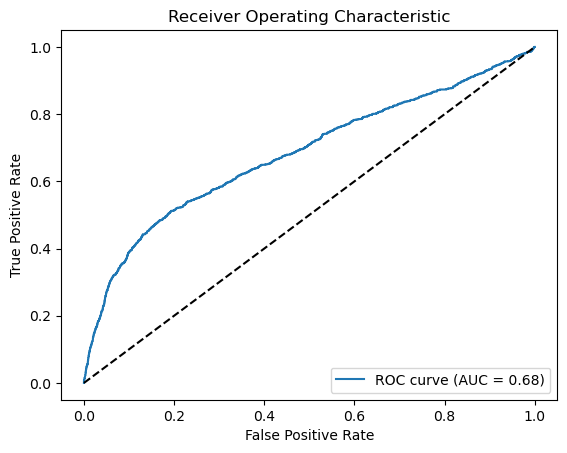

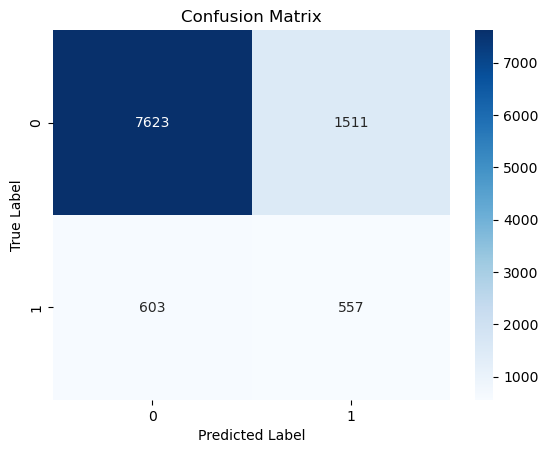

In [44]:
# Obtener las probabilidades de predicción
y_pred_prob = best_model_nn.predict(X_test)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Paso 6: Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Aplicar umbral a las probabilidades para obtener predicciones discretas
umbral = 0.5
y_pred_discreto = np.where(y_pred_prob >= umbral, 1, 0)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_discreto)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### AdaBoost (Adaptative Boosting):

In [30]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search = GridSearchCV(ada_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` 

Test Accuracy: 85.14%


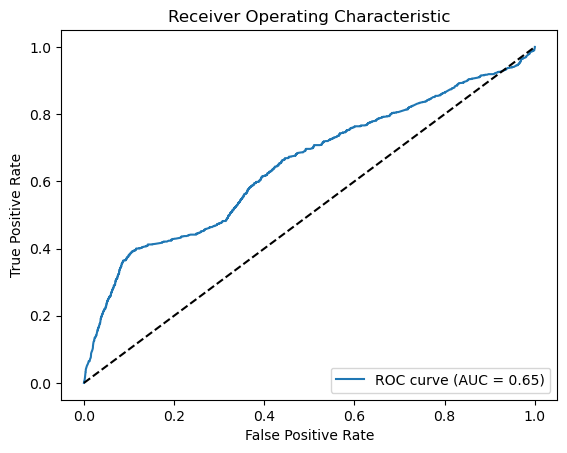

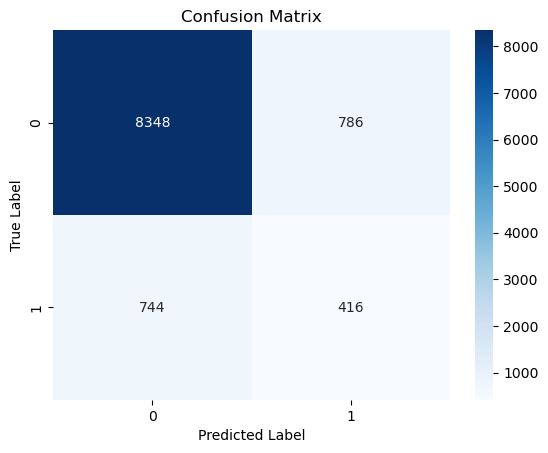

In [31]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_ada_boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Nuevas cosas a probar para combatir el desbalanceo: 


- **SMOTE** (Synthetic Minority Over-sampling Technique): SMOTE es una técnica de sobremuestreo que genera instancias sintéticas de la clase minoritaria mediante la interpolación de las instancias existentes. Ayuda a aumentar el número de ejemplos de la clase minoritaria y equilibrar la distribución de clases.


- **ADASYN** (Adaptive Synthetic Sampling): ADASYN es una variante del algoritmo SMOTE que también tiene en cuenta la densidad relativa de las instancias para generar instancias sintéticas. Se enfoca en generar más instancias en regiones con mayor dificultad de clasificación.


- **NearMiss** NearMiss es una técnica de submuestreo que reduce el número de instancias de la clase mayoritaria al eliminar aquellas instancias que están más cerca de las instancias de la clase minoritaria. Puede haber diferentes variantes de NearMiss, como NearMiss-1, NearMiss-2 y NearMiss-3, cada una con diferentes criterios de selección.


- **SMOTE-ENN** SMOTE-ENN combina la técnica de sobremuestreo SMOTE con una técnica de submuestreo llamada Edited Nearest Neighbors (ENN). SMOTE se utiliza para generar instancias sintéticas y luego ENN se utiliza para eliminar las instancias sintéticas que están mal clasificadas por los vecinos más cercanos.


- **Balanced Random Forest** Balanced Random Forest es una variante del Random Forest que ajusta los pesos de las instancias en función de la proporción de clases durante la construcción de los árboles. Ayuda a equilibrar la importancia de las clases durante la clasificación.


- **EasyEnsemble** EasyEnsemble es un método de ensamblado que crea múltiples conjuntos de datos balanceados mediante el uso de técnicas de submuestreo. Luego, entrena múltiples clasificadores base en estos conjuntos de datos y combina sus predicciones para obtener una predicción final.



In [32]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Definir los clasificadores base
rf_classifier = RandomForestClassifier(random_state=14)
lr_classifier = LogisticRegression(random_state=14)
knn_classifier = KNeighborsClassifier()

# Definir el StackingClassifier
estimators = [
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('knn', knn_classifier)
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Definir los hiperparámetros para ajustar
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'knn__n_neighbors': [3, 5, 7],
    'final_estimator__C': [0.1, 1, 10]
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(stacking_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Utilizar el mejor modelo para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Mejores parámetros: {'final_estimator__C': 0.1, 'knn__n_neighbors': 7, 'rf__n_estimators': 300}
Precisión: 0.8732271225956868


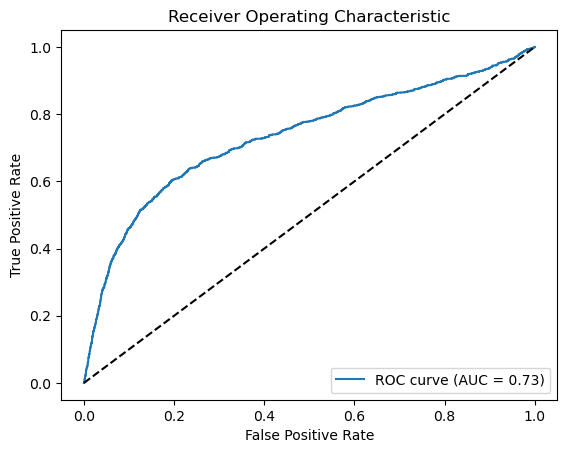

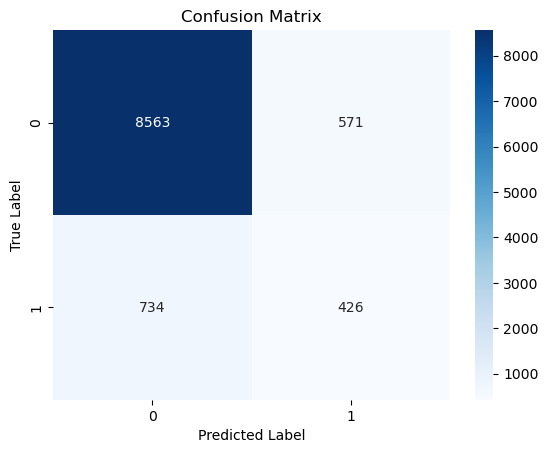

In [33]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()